In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('Training Dataset.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_org=train.copy()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train.shape

(614, 13)

In [9]:
train.duplicated().sum()

0

In [10]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [11]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [13]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [14]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
loan_sta_count=train['Loan_Status'].value_counts(normalize=True)    

In [16]:
loan_sta_count

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

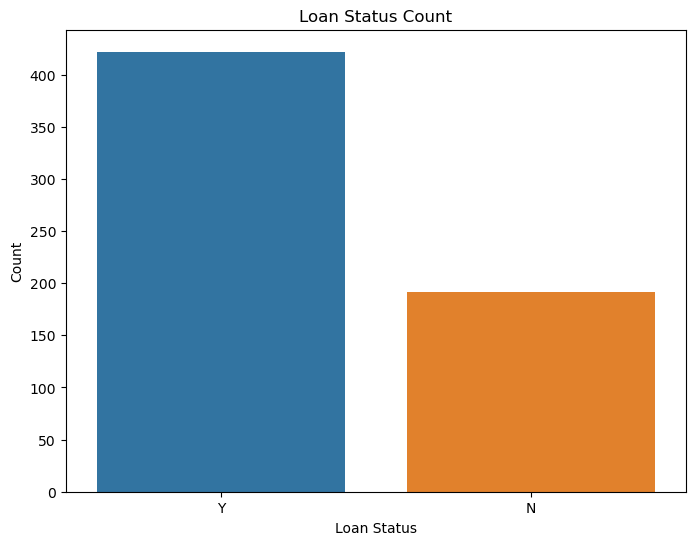

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=train)
plt.title('Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Self Employed')

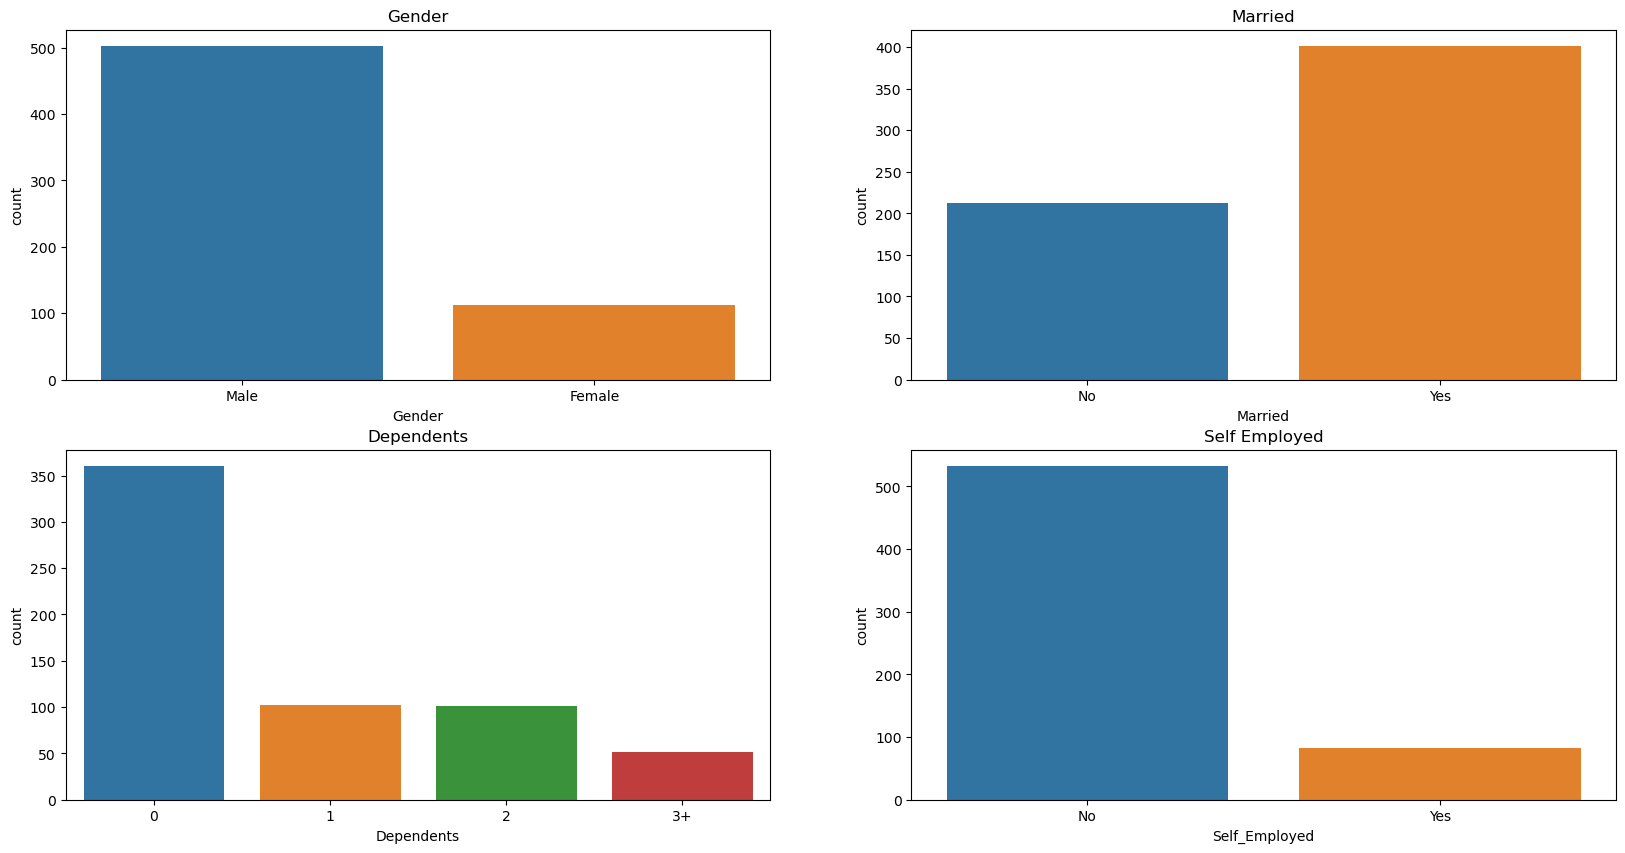

In [18]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
sns.countplot(x='Gender', data=train)
plt.title('Gender')

plt.subplot(222)
sns.countplot(x='Married', data=train)
plt.title('Married')

plt.subplot(223)
sns.countplot(x='Dependents', data=train)
plt.title('Dependents')

plt.subplot(224)
sns.countplot(x='Self_Employed', data=train)
plt.title('Self Employed')

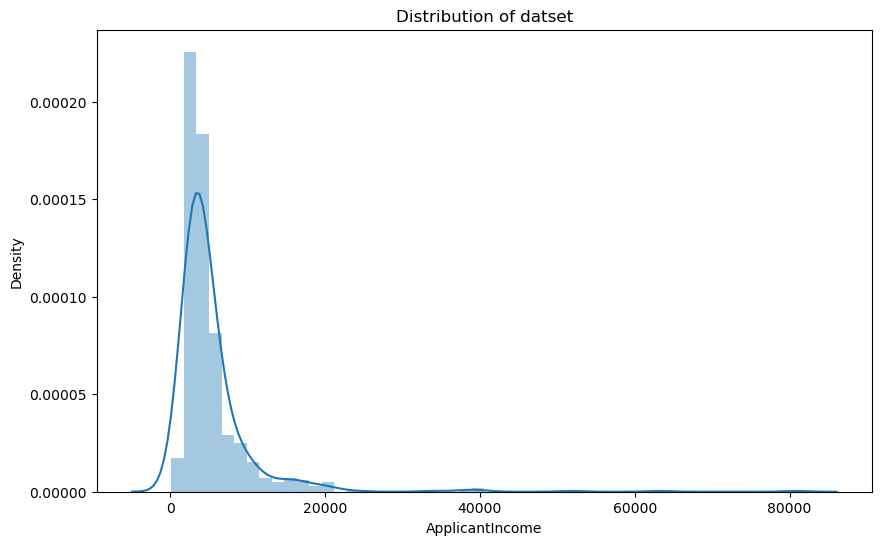

In [19]:
plt.figure(figsize=(10,6))
plt.title('Distribution of datset')
sns.distplot(train['ApplicantIncome'])
plt.show()

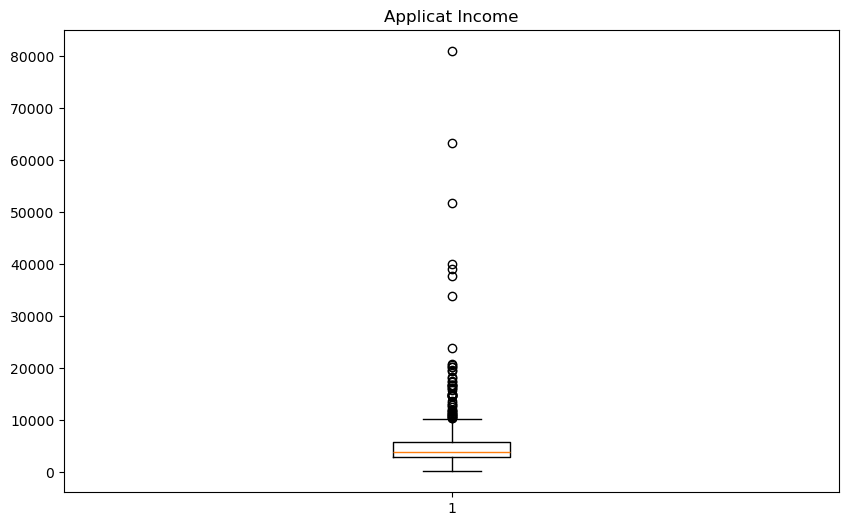

In [20]:
plt.figure(figsize=(10,6))
plt.title('Applicat Income')
plt.boxplot(train['ApplicantIncome'],vert=True)
plt.show();

Text(0.5, 0.98, '')

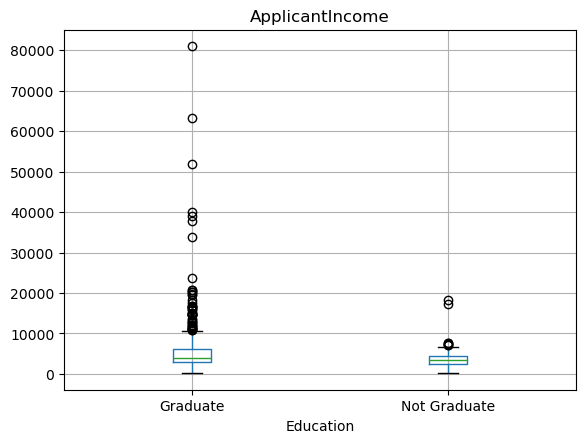

In [21]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("") 

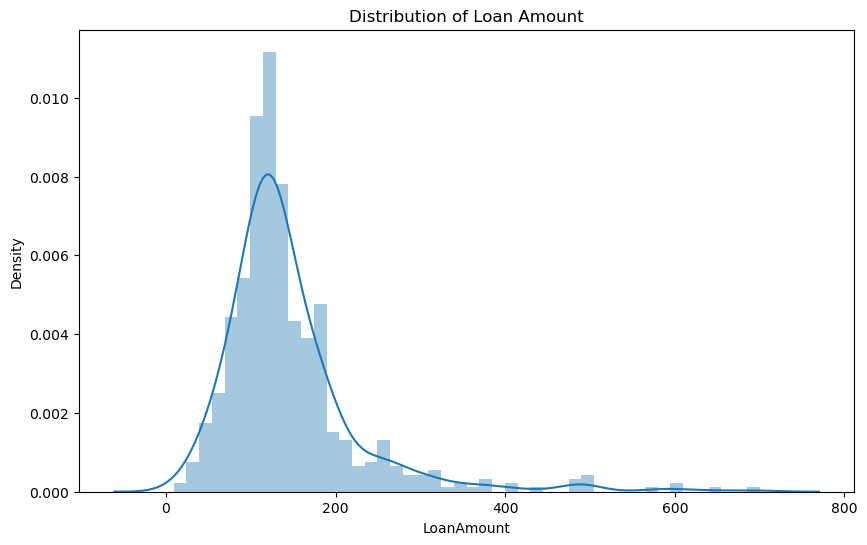

In [22]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Loan Amount')
sns.distplot(train['LoanAmount'])
plt.show()

<Axes: >

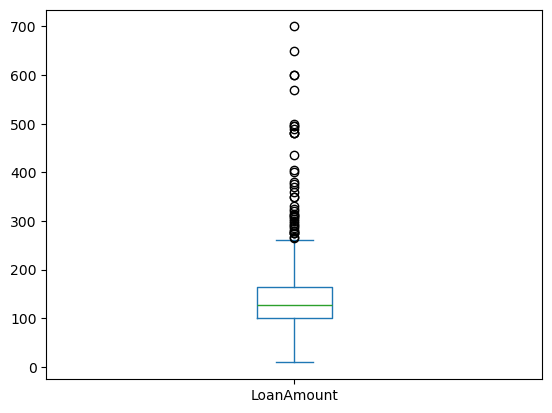

In [23]:
train['LoanAmount'].plot.box()

In [24]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='Gender'>

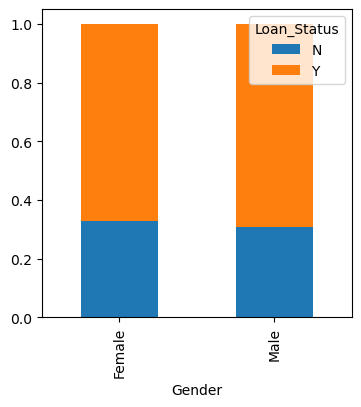

In [25]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',
                                                   stacked=True,figsize=(4,4))

In [26]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


Loan_Status    N    Y
Married              
No            79  134
Yes          113  288
---------------------------------------------------
Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82
---------------------------------------------------
Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56
---------------------------------------------------


<Axes: xlabel='Self_Employed'>

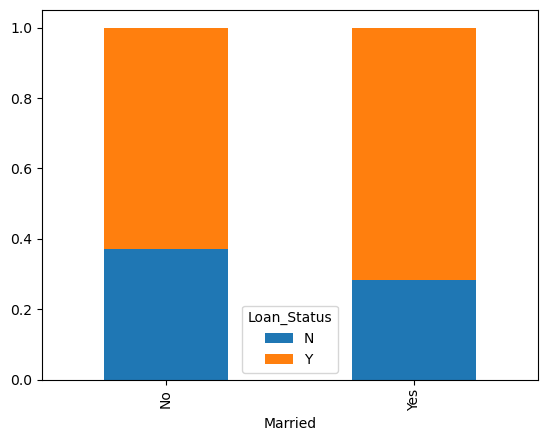

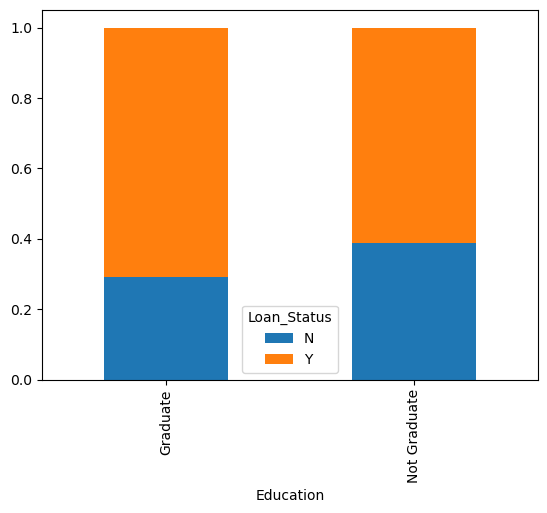

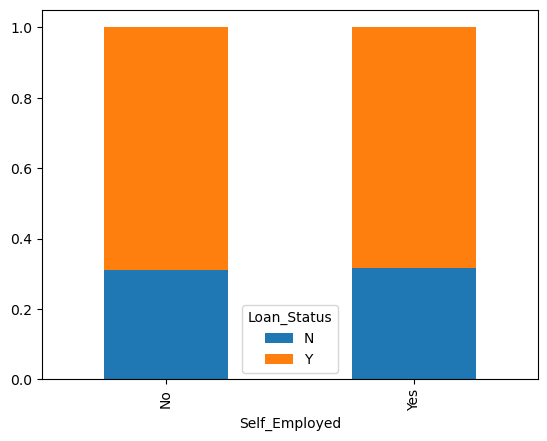

In [27]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
print(Married)
print("---------------------------------------------------")
Education=pd.crosstab(train['Education'],train['Loan_Status'])
print(Education)
print("---------------------------------------------------")
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
print(Self_Employed)
print("---------------------------------------------------")
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

<Axes: xlabel='Property_Area'>

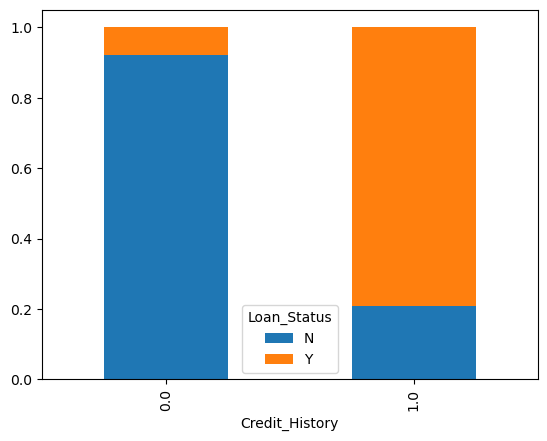

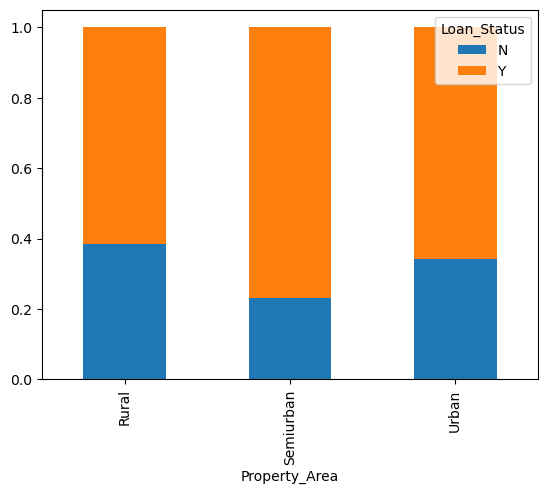

In [28]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

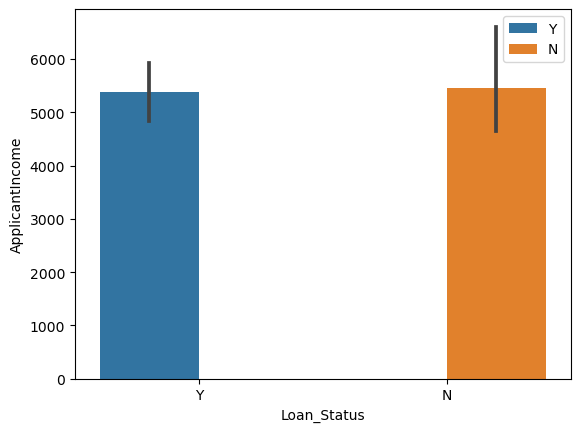

In [29]:
sns.barplot(data=train,x='Loan_Status',y='ApplicantIncome',hue='Loan_Status')
plt.legend()

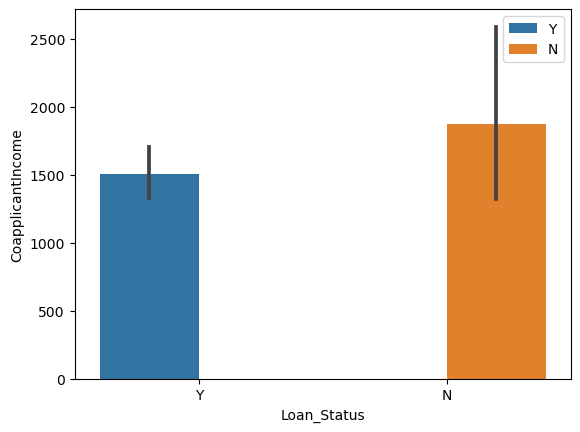

In [30]:
sns.barplot(data=train,x='Loan_Status',y='CoapplicantIncome',hue='Loan_Status',)
plt.legend()

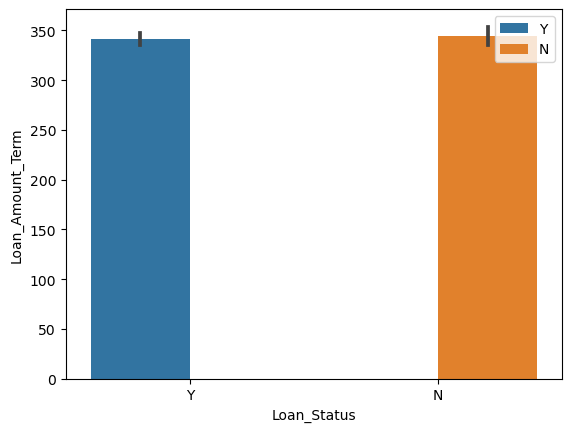

In [31]:
sns.barplot(data=train,x='Loan_Status',y='Loan_Amount_Term',hue='Loan_Status')
plt.legend()

In [32]:
train['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

In [33]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [37]:
train.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis=1,inplace=True)

In [38]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,128.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1
610,4106,0.0,40.0,180.0,1.0,1
611,8072,240.0,253.0,360.0,1.0,1
612,7583,0.0,187.0,360.0,1.0,1


In [39]:
matrix=train.corr()

<Axes: >

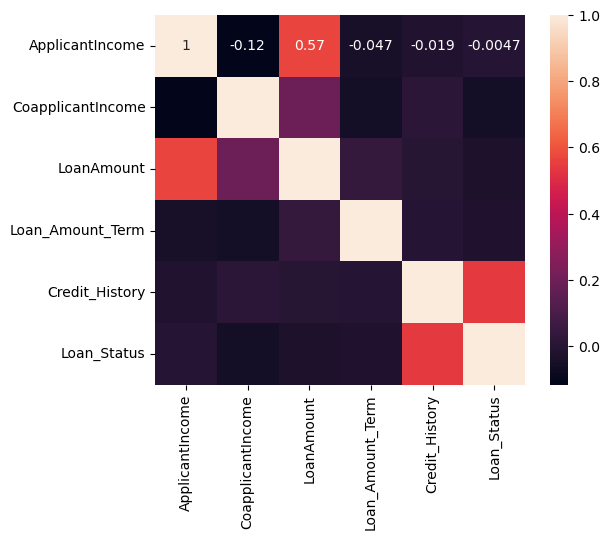

In [40]:
sns.heatmap(matrix,square=True,annot=True)

<Axes: >

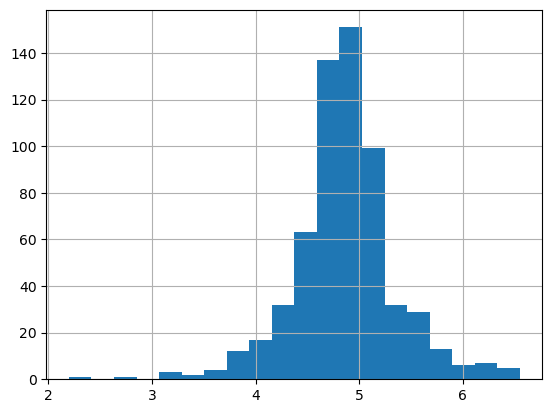

In [41]:
train['Loan_Amount_log']=np.log(train['LoanAmount'])
train['Loan_Amount_log'].hist(bins=20)

<Axes: >

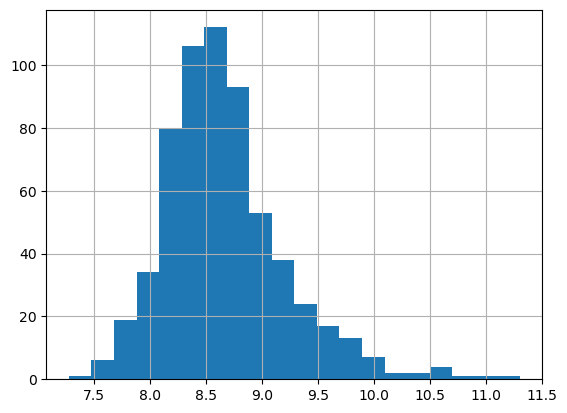

In [42]:
train['Total_income']=train['ApplicantIncome']+train['CoapplicantIncome']
train['total_income_log']=np.log(train['Total_income'])
train['total_income_log'].hist(bins=20)

In [43]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_Amount_log,Total_income,total_income_log
0,5849,0.0,128.0,360.0,1.0,1,4.852030,5849.0,8.674026
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,6091.0,8.714568
2,3000,0.0,66.0,360.0,1.0,1,4.189655,3000.0,8.006368
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,4941.0,8.505323
4,6000,0.0,141.0,360.0,1.0,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,4.262680,2900.0,7.972466
610,4106,0.0,40.0,180.0,1.0,1,3.688879,4106.0,8.320205
611,8072,240.0,253.0,360.0,1.0,1,5.533389,8312.0,9.025456
612,7583,0.0,187.0,360.0,1.0,1,5.231109,7583.0,8.933664


In [44]:
train= pd.get_dummies(train,drop_first=True)
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_Amount_log,Total_income,total_income_log
0,5849,0.0,128.0,360.0,1.0,1,4.852030,5849.0,8.674026
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,6091.0,8.714568
2,3000,0.0,66.0,360.0,1.0,1,4.189655,3000.0,8.006368
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,4941.0,8.505323
4,6000,0.0,141.0,360.0,1.0,1,4.948760,6000.0,8.699515


In [46]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

In [47]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
train=scale.fit_transform(X,y)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_train_pred)
train_acc

0.8088578088578089

In [52]:
scores=cross_val_score(model,X,y,cv=5)
score = []
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 80.95%


In [53]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=17)
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [54]:
y_train_pred=Knn.predict(X_train)
y_test_pred=Knn.predict(X_test)

In [55]:
y_train_acc=accuracy_score(y_train,y_train_pred)
y_train_acc

0.6899766899766899

In [56]:
y_test_acc=accuracy_score(y_test,y_test_pred)
y_test_acc

0.7027027027027027

In [57]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier()
scores=cross_val_score(Knn,X,y,cv=50)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 63.01%


In [58]:
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier(max_depth=5) #when max depth none its overfitting
d_tree.fit(X_train,y_train)
y_train_pred=d_tree.predict(X_train)
y_test_pred=d_tree.predict(X_test)

In [59]:
y_train_acc=accuracy_score(y_train,y_train_pred)
print(y_train_acc)
y_test_acc=accuracy_score(y_test,y_test_pred)
print(y_test_acc)

0.8368298368298368
0.8216216216216217


In [60]:
scores=cross_val_score(d_tree,X,y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 79.15%


In [61]:
from sklearn.ensemble import RandomForestClassifier
R_Forest=RandomForestClassifier(max_depth=6)
R_Forest.fit(X_train,y_train)
y_train_pred_r=R_Forest.predict(X_train)
y_test_pred_r=R_Forest.predict(X_test)

In [62]:
train_acc=accuracy_score(y_train,y_train_pred_r)
print(train_acc)
test_acc=accuracy_score(y_test,y_test_pred_r)
print(test_acc)

0.8484848484848485
0.8216216216216217


In [63]:
scores=cross_val_score(R_Forest,X,y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 80.30%


In [64]:
from sklearn.ensemble import GradientBoostingClassifier
g_boosting=GradientBoostingClassifier(learning_rate=0.01,n_estimators=150)
g_boosting.fit(X_train,y_train)
g_boost_train_pred=g_boosting.predict(X_train)
g_boost_test_pred=g_boosting.predict(X_test)

In [65]:
train_acc=accuracy_score(y_train,g_boost_train_pred)
print(train_acc)
test_acc=accuracy_score(y_test,g_boost_test_pred)
print(test_acc)

0.8158508158508159
0.827027027027027


In [66]:
scores=cross_val_score(g_boosting,X,y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 79.16%


In [67]:
from sklearn.svm import SVC
svc=SVC(max_iter=2)
svc.fit(X_train,y_train)
svc_train_pred=svc.predict(X_train)
svc_test_pred=svc.predict(X_test)

In [68]:
train_acc=accuracy_score(y_train,svc_train_pred)
print(train_acc)
test_acc=accuracy_score(y_test,svc_test_pred)
print(test_acc)

0.6526806526806527
0.6972972972972973


In [69]:
scores=cross_val_score(svc,X,y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 53.90%


In [70]:
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Amount_log,Total_income,total_income_log
377,4310,0.0,130.0,360.0,1.0,4.867534,4310.0,8.368693
23,3365,1917.0,112.0,360.0,0.0,4.718499,5282.0,8.572060
266,4708,1387.0,150.0,360.0,1.0,5.010635,6095.0,8.715224
331,2935,0.0,98.0,360.0,1.0,4.584967,2935.0,7.984463
306,3762,1666.0,135.0,360.0,1.0,4.905275,5428.0,8.599326
...,...,...,...,...,...,...,...,...
582,3166,0.0,36.0,360.0,1.0,3.583519,3166.0,8.060224
153,2281,0.0,113.0,360.0,1.0,4.727388,2281.0,7.732369
273,2620,2223.0,150.0,360.0,1.0,5.010635,4843.0,8.485290
34,12500,3000.0,320.0,360.0,1.0,5.768321,15500.0,9.648595
